In [2]:
#Library loading
import numpy as np 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [3]:
main_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = main_df.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Shape of dataframe

df.shape

(7043, 21)

In [5]:
# List of all columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Basic Information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# List of all features with number of unique values present in them

df.nunique()


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
# Statistical measure of dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
# We are dropping CustomerID because it will not make any contribution in prediction.
df.drop("customerID",axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Here totalcharges are object types so we need to change it into numeric format
df["TotalCharges"].dtypes

dtype('O')

In [12]:
# Changing in numeric format
# df["TotalCharges"].astype(float)
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')
df["TotalCharges"].dtypes

dtype('float64')

In [13]:
# Checking for null values 
df.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
# Dropping all the rows in which value in not known
df=df.drop(df[df["TotalCharges"].isnull()].index)
df.reset_index(drop=True,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.shape

(7032, 20)

<AxesSubplot:>

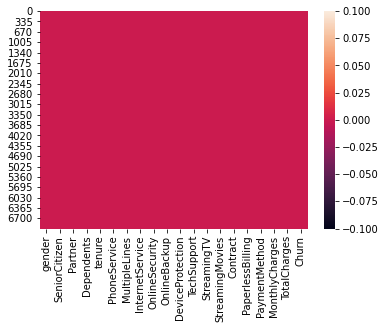

In [16]:
# Visualization of null values

sns.heatmap(df.isnull())

In [17]:
# Checking Correlation 
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<AxesSubplot:>

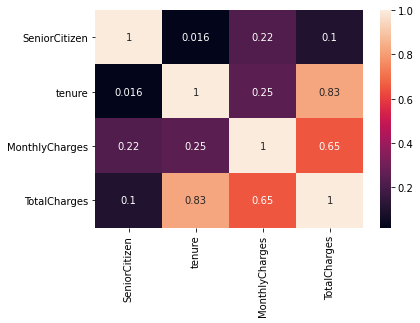

In [18]:
# Visualizing correalation
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

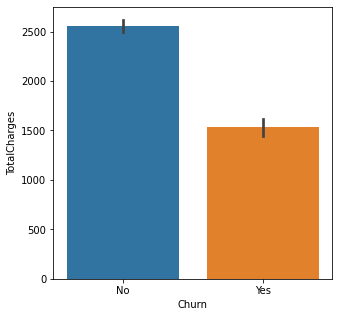

In [19]:
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='Churn',y='TotalCharges')

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

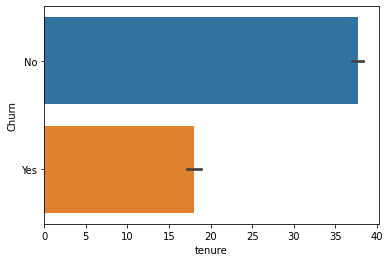

In [20]:
sns.barplot(data=df,y='Churn',x='tenure')

In [21]:
px.scatter(df,x="tenure",y="TotalCharges")


In [22]:
diag=px.pie(df,names="Churn",values="TotalCharges",hole=0.5)
diag.show()

In [23]:
lables=df["MultipleLines"].unique()
values=df["MultipleLines"].value_counts()
diag=go.Figure(data=[go.Pie(labels=lables,values=values,pull=[0.01,0.02,0.03])])
diag.show()

In [24]:
lables=df["InternetService"].unique()
values=df["InternetService"].value_counts()
diag=go.Figure(data=[go.Pie(labels=lables,values=values,pull=[0.01,0.02,0.03])])
diag.show()

In [25]:
lables=df["PaymentMethod"].unique()
values=df["PaymentMethod"].value_counts()
diag=go.Figure(data=[go.Pie(labels=lables,values=values,pull=[0.01,0.02,0.03])])
diag.show()

In [26]:
lables=df["Contract"].unique()
values=df["Contract"].value_counts()
diag=go.Figure(data=[go.Pie(labels=lables,values=values,pull=[0.01,0.02,0.03])])
diag.show()

In [27]:
#Preprocessing the data

df["Partner"].value_counts(ascending= True)

Yes    3393
No     3639
Name: Partner, dtype: int64

In [28]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(f'{i}:{df[i].unique()}')
    print("********************************************")

gender:['Female' 'Male']
********************************************
********************************************
Partner:['Yes' 'No']
********************************************
Dependents:['No' 'Yes']
********************************************
********************************************
PhoneService:['No' 'Yes']
********************************************
MultipleLines:['No phone service' 'No' 'Yes']
********************************************
InternetService:['DSL' 'Fiber optic' 'No']
********************************************
OnlineSecurity:['No' 'Yes' 'No internet service']
********************************************
OnlineBackup:['Yes' 'No' 'No internet service']
********************************************
DeviceProtection:['No' 'Yes' 'No internet service']
********************************************
TechSupport:['No' 'Yes' 'No internet service']
********************************************
StreamingTV:['No' 'Yes' 'No internet service']
*******************************

In [29]:
df.replace('No phone service','No',inplace=True)
df.replace('No internet service','No',inplace=True)

In [30]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(f'{i}:{df[i].unique()}')
    print("********************************************")

gender:['Female' 'Male']
********************************************
********************************************
Partner:['Yes' 'No']
********************************************
Dependents:['No' 'Yes']
********************************************
********************************************
PhoneService:['No' 'Yes']
********************************************
MultipleLines:['No' 'Yes']
********************************************
InternetService:['DSL' 'Fiber optic' 'No']
********************************************
OnlineSecurity:['No' 'Yes']
********************************************
OnlineBackup:['Yes' 'No']
********************************************
DeviceProtection:['No' 'Yes']
********************************************
TechSupport:['No' 'Yes']
********************************************
StreamingTV:['No' 'Yes']
********************************************
StreamingMovies:['No' 'Yes']
********************************************
Contract:['Month-to-month' 'One year' 'Tw

In [31]:
print(df["gender"].value_counts(ascending=True))

Female    3483
Male      3549
Name: gender, dtype: int64


In [32]:
df['gender'].replace({'Male':0,'Female':1},inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
for i in df.columns:
    if (len(df[i].unique())>2) & (df[i].dtypes!='int64')  & (df[i].dtypes!='float64'):
        print(f'{i}')
    

InternetService
Contract
PaymentMethod


In [34]:
print(df["InternetService"].value_counts(ascending=True))
print(df["Contract"].value_counts(ascending=True))
print(df["PaymentMethod"].value_counts(ascending=True))

No             1520
DSL            2416
Fiber optic    3096
Name: InternetService, dtype: int64
One year          1472
Two year          1685
Month-to-month    3875
Name: Contract, dtype: int64
Credit card (automatic)      1521
Bank transfer (automatic)    1542
Mailed check                 1604
Electronic check             2365
Name: PaymentMethod, dtype: int64


In [35]:
len(df["PaymentMethod"].unique())

4

In [36]:
len(df["Contract"].unique())

3

In [37]:
len(df["InternetService"].unique())

3

In [38]:
morethan2=["PaymentMethod","Contract","InternetService"]
df=pd.get_dummies(df, columns=morethan2,)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,Yes,No,1,No,No,No,Yes,No,...,0,0,1,0,1,0,0,1,0,0
1,0,0,No,No,34,Yes,No,Yes,No,Yes,...,0,0,0,1,0,1,0,1,0,0
2,0,0,No,No,2,Yes,No,Yes,Yes,No,...,0,0,0,1,1,0,0,1,0,0
3,0,0,No,No,45,No,No,Yes,No,Yes,...,1,0,0,0,0,1,0,1,0,0
4,1,0,No,No,2,Yes,No,No,No,No,...,0,0,1,0,1,0,0,0,1,0


In [39]:
df.shape

(7032, 27)

In [40]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

In [41]:
for i in df.columns:
    if (df[i].dtypes=="int64") | (df[i].dtypes=="float64"):
        print(i)
    

gender
SeniorCitizen
tenure
MonthlyCharges
TotalCharges


In [42]:
#Above feature column have numerical data so we will need to bring it into a particular range if they varies a lot
# Using MinMaxScaler of Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [43]:
df["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [44]:
largcol=["tenure","MonthlyCharges","TotalCharges"]
df[largcol]=scaler.fit_transform(df[largcol])
df[largcol]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7027,0.323944,0.662189,0.227521
7028,1.000000,0.845274,0.847461
7029,0.140845,0.112935,0.037809
7030,0.042254,0.558706,0.033210


In [45]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,Yes,No,0.000000,No,No,No,Yes,No,...,0,0,1,0,1,0,0,1,0,0
1,0,0,No,No,0.464789,Yes,No,Yes,No,Yes,...,0,0,0,1,0,1,0,1,0,0
2,0,0,No,No,0.014085,Yes,No,Yes,Yes,No,...,0,0,0,1,1,0,0,1,0,0
3,0,0,No,No,0.619718,No,No,Yes,No,Yes,...,1,0,0,0,0,1,0,1,0,0
4,1,0,No,No,0.014085,Yes,No,No,No,No,...,0,0,1,0,1,0,0,0,1,0


In [46]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(i)

Partner
Dependents
PhoneService
MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
Churn


In [47]:
objcolum=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]
for i in objcolum:
    df[i].replace({"Yes":1,"No":0},inplace=True)
df.head()
    

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [49]:
y=df["Churn"]

X=df.drop("Churn",axis=1)
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [50]:
X.shape,y.shape

((7032, 26), (7032,))

In [51]:
# Performing Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4711, 26), (2321, 26), (4711,), (2321,))

In [52]:
#Model_Building
#Logistic_regression
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model_lg=LogisticRegression(max_iter=120,random_state=0,n_jobs=20)

In [53]:
#train the model
model_lg.fit(X_train,y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [54]:
#model prediction
pred_lg=model_lg.predict(X_test)


In [56]:
#Accuracy score
lg=(round(accuracy_score(y_test,pred_lg)*100,2))
print(lg)

80.01


In [57]:
#classification_report
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1711
           1       0.64      0.54      0.58       610

    accuracy                           0.80      2321
   macro avg       0.74      0.72      0.73      2321
weighted avg       0.79      0.80      0.79      2321



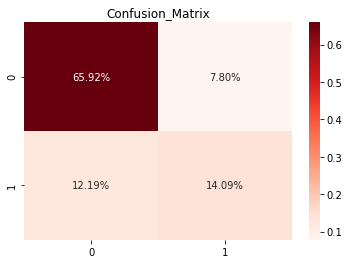

In [58]:
#confusion_matrix
cm=confusion_matrix(y_test,pred_lg)
sns.heatmap(cm/np.sum(cm),annot=True,fmt="0.2%",cmap="Reds")
plt.title("Confusion_Matrix",fontsize=12)
plt.show()

In [59]:
#Using decision Tree Classifer
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=4,random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [60]:
dt_pred=dt.predict(X_test)
dt_pred


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [66]:
#Accuracy_score
dt=(round(accuracy_score(y_test,dt_pred)*100,2))
print(dt)

78.89


In [67]:
#Classification_report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1711
           1       0.63      0.48      0.54       610

    accuracy                           0.79      2321
   macro avg       0.73      0.69      0.70      2321
weighted avg       0.78      0.79      0.78      2321



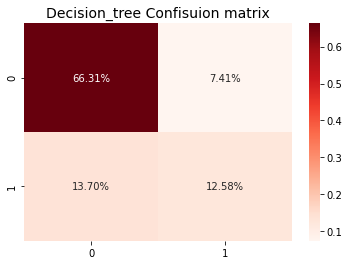

In [68]:
#Confusion_matrix
cm=confusion_matrix(y_test,dt_pred)
sns.heatmap(cm/np.sum(cm),annot=True,fmt="0.2%",cmap="Reds")
plt.title("Decision_tree Confisuion matrix",fontsize=14)
plt.show()


In [69]:
#Random forest model
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=300,min_samples_leaf=1,random_state=42)


In [70]:
#train the model
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [71]:
y_yred=rfc.predict(X_test)
y_yred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [72]:
#Accuracy_score
rfc=(round(accuracy_score(y_test,y_yred)*100,2))
print(rfc)

78.76


In [73]:
print(classification_report(y_test,y_yred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1711
           1       0.62      0.50      0.55       610

    accuracy                           0.79      2321
   macro avg       0.73      0.70      0.71      2321
weighted avg       0.78      0.79      0.78      2321



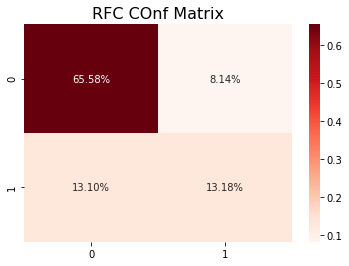

In [74]:
#Confusion matrix
cm=confusion_matrix(y_test,y_yred)
sns.heatmap(cm/np.sum(cm),annot=True,fmt="0.2%",cmap="Reds")
plt.title("RFC COnf Matrix",fontsize=16)
plt.show()

In [75]:
#XGBOOST CLassifier
from xgboost import XGBClassifier


ModuleNotFoundError: No module named 'xgboost'

In [77]:
#AdaboostClassifier
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier( n_estimators=205,learning_rate=1,random_state=42)


In [78]:
abc.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=205, random_state=42)

In [79]:
#Prediction
y_pred=abc.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [80]:
#Accuracy_score
abc=(round(accuracy_score(y_test,y_pred)*100,2))
print(abc)

80.27


In [81]:
#Classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.65      0.54      0.59       610

    accuracy                           0.80      2321
   macro avg       0.75      0.72      0.73      2321
weighted avg       0.79      0.80      0.80      2321



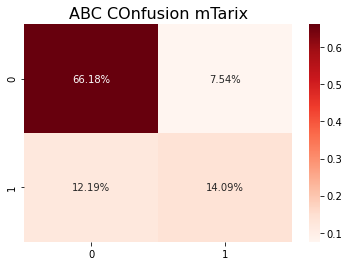

In [82]:
#Confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm/np.sum(cm),annot=True,fmt="0.2%",cmap="Reds")
plt.title("ABC COnfusion mTarix",fontsize=16)
plt.show()

In [83]:
#Using KNeighbours
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=9,leaf_size=20)

In [84]:
knc.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [85]:
y_pred=knc.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [89]:
knc=(round(accuracy_score(y_test,y_pred)*100,2))
print(knc)

76.99


In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1711
           1       0.56      0.56      0.56       610

    accuracy                           0.77      2321
   macro avg       0.70      0.70      0.70      2321
weighted avg       0.77      0.77      0.77      2321



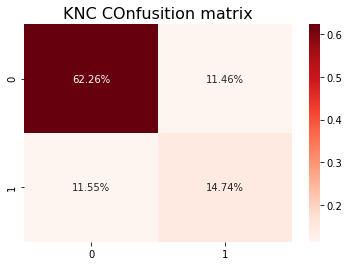

In [88]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm/np.sum(cm),annot=True,fmt="0.2%",cmap="Reds")
plt.title("KNC COnfusition matrix",fontsize=16)
plt.show()

In [90]:
#SVM
from sklearn.svm import SVC,LinearSVC

In [91]:
svc=SVC(kernel='rbf',random_state=42)

In [92]:
svc.fit(X_train,y_train)

SVC(random_state=42)

In [93]:
y_pred=svc.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [94]:
svm=round(accuracy_score(y_test,y_pred)*100,2)
print(svm)

79.84


In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.65      0.50      0.57       610

    accuracy                           0.80      2321
   macro avg       0.74      0.70      0.72      2321
weighted avg       0.79      0.80      0.79      2321



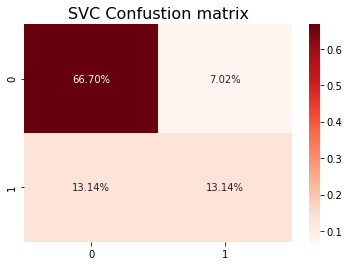

In [96]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm/np.sum(cm),annot=True,fmt="0.2%",cmap="Reds")
plt.title("SVC Confustion matrix",fontsize=16)
plt.show()

In [99]:
models=pd.DataFrame({'Models':['Logistic Regression','KNeighbours','SVM','Adaboost','Decision Tree','Random Forest'],'Accoracy_Score':[lg,knc,svm,abc,dt,rfc]})
models


,Models,Accoracy_Score
0,Logistic Regression,80.01
1,KNeighbours,76.99
2,SVM,79.84
3,Adaboost,80.27
4,Decision Tree,78.89
5,Random Forest,78.76


,Models,Accoracy_Score
3,Adaboost,80.27
0,Logistic Regression,80.01
2,SVM,79.84
4,Decision Tree,78.89
5,Random Forest,78.76
1,KNeighbours,76.99


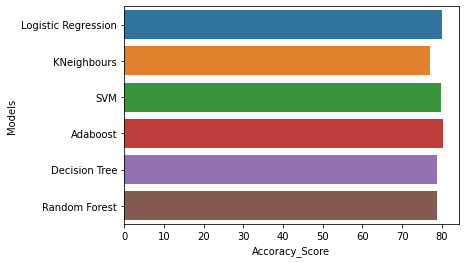

In [101]:
sns.barplot(x='Accoracy_Score',y='Models',data=models)
models.sort_values(by='Accoracy_Score',ascending=False)
